# Lista de Exercícios 07 – Raízes de Equações – Secantes

## 1 - Utilize o método das secantes para encontre a raiz aproximada das seguintes equações. Considere os seguintes pontos:
- Precisão de 6 casas decimais;
- Número máximo de 50 iterações e $\epsilon < 10^{-5}$;
- Isole o intervalo da raiz;
- Analise a convergência do método;
- Apresente o código, solução e passo a passo para chegar nas respostas.

In [22]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as pyplot
from IPython.display import Math
#from secantes import secantes

TOLERANCIA=10e-5
ITERACOES=50

x = sy.Symbol('x')

def plot(fx, intervalo):
    xx = np.linspace(intervalo[0], intervalo[1])
    pyplot.plot(xx, fx(xx), label='f(x)')
    pyplot.grid()
    pyplot.show()

In [23]:
import pandas as pd

def secantes(f,intervalo,tol=TOLERANCIA,n=ITERACOES):
    xl=intervalo[0]
    xll=intervalo[1]
    dados=pd.DataFrame()
    for i in range(n):
        x=xl-f(xl)*(xl-xll)/(f(xl)-f(xll))
        fx=f(x)
        error=abs((x-xl)/max(x,1))
        
        dados_atual=pd.DataFrame({'erro':[error], 'x':[x],'f(x)':[fx]})
        dados=pd.concat([dados,dados_atual], ignore_index=True)
        if (fx==0) or (error<tol):
            break
        xll=xl
        xl=x
    return x, dados

### a) $f(x) = \dfrac{ x \cos{(x^3 + 1)}}{2}$

<IPython.core.display.Math object>

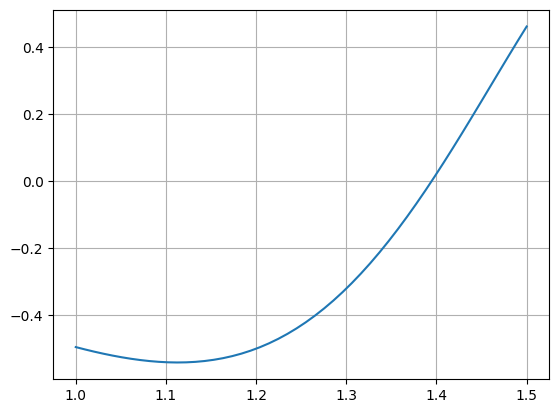

In [28]:
# Definição do intervalo
fx_ = sy.cos(x**3+2) * x/2
display(Math('f(x) = ' + sy.latex(fx_)))
fx = sy.lambdify(x, fx_)
#plot(fx, [-100, 100])
#plot(fx, [0, 25])
#plot(fx, [0, 5])
plot(fx, [1, 1.5])

In [ ]:
intervalo=[1,1.5]
raiz, iteracoes = secantes(fx, intervalo)
display(iteracoes)
#o metodo nao converge, a nao ser que retire a parte atras de 1.2

,erro,x,f(x)
0,2.055842e-01,1.258787e+00,-4.139640e-01
1,5.122555e-01,2.580832e+00,1.216297e+00
2,6.185971e-01,1.594487e+00,7.763619e-01
3,1.740624e+00,-1.461369e-01,3.019970e-02
4,7.044892e-02,-2.165858e-01,4.406299e-02
5,2.239144e-01,7.328565e-03,-1.524881e-03
6,7.489772e-03,-1.612069e-04,3.354286e-05
7,1.612067e-04,-1.356608e-10,2.822740e-11
8,1.356608e-10,1.241831e-21,-2.583920e-22


### b) $f(x) = e^\frac{\cos{(x)}}{2} - 1$

<IPython.core.display.Math object>

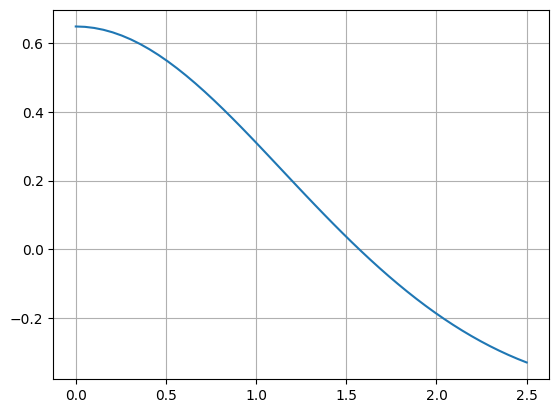

In [26]:
# Definição do intervalo
fx_ = sy.exp(sy.cos(x)/2) -1
display(Math('f(x) = ' + sy.latex(fx_)))
fx = sy.lambdify(x, fx_)
#plot(fx, [-100, 100])
#plot(fx, [-10, 10])
plot(fx, [0, 2.5])

In [ ]:
intervalo=[0,2.5]
raiz, iteracoes = secantes(fx, intervalo)
display(iteracoes)
#o metodo convergiu

,erro,x,f(x)
0,1.000000e+00,1.656956,-4.211428e-02
1,6.491891e-02,1.555946,7.452446e-03
2,9.666325e-03,1.571133,-1.684414e-04
3,2.136965e-04,1.570798,-6.185904e-07
4,7.876803e-07,1.570796,5.211565e-11


### c) $f(x) = x^5 - 3x^3 + 2x^2 - 5x + 10$

<IPython.core.display.Math object>

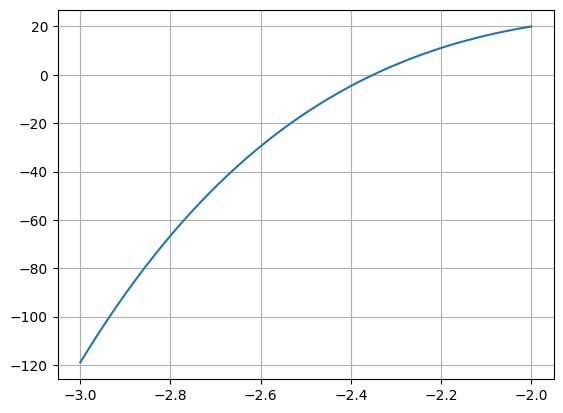

In [41]:
# Definição do intervalo
fx_ = x**5 - 3*x**3 + 2*x**2 - 5*x + 10
display(Math('f(x) = ' + sy.latex(fx_)))
fx = sy.lambdify(x, fx_)
#plot(fx, [-100, 100])
#plot(fx, [-10, 10])
#plot(fx, [-5, 5])
#plot(fx, [-3, 3])
plot(fx, [-3, -2])


In [ ]:
intervalo=[-3,-2]
raiz, iteracoes = secantes(fx, intervalo)
display(iteracoes)
#o metodo convergiu

,erro,x,f(x)
0,0.856115,-2.143885,1.418283e+01
1,0.091169,-2.235054,8.886558e+00
2,0.152971,-2.388025,-3.459712e+00
3,0.042866,-2.345159,4.836979e-01
4,0.005258,-2.350417,2.143500e-02
5,0.000244,-2.350661,-1.427666e-04
6,0.000002,-2.350659,4.169491e-08


### e) $f(x) = \dfrac{(x^4 - 3x^3 - 5x^2) \sin(x)}{x^3 + 10}$

<IPython.core.display.Math object>

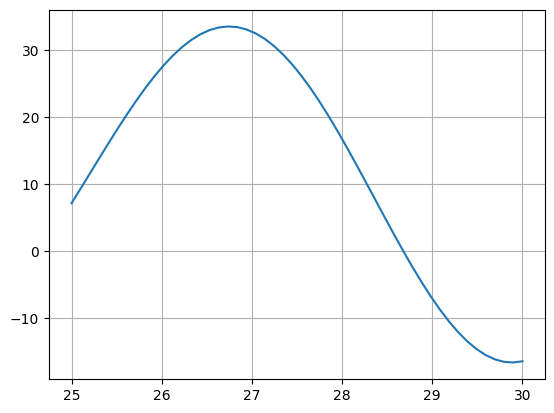

In [ ]:
# Definição do intervalo
fx_ = ((x**4 - 3*x**3 - 5*x**2)* sy.sin(x))/x**3 + 10
display(Math('f(x) = ' + sy.latex(fx_)))
fx = sy.lambdify(x, fx_)
#plot(fx, [-100, 100])
plot(fx, [25, 30])

In [ ]:
intervalo=[25,30]
raiz, iteracoes = secantes(fx, intervalo)
display(iteracoes)
#nao convergiu,tem que filtrar mais entre 28 e 29

,erro,x,f(x)
0,0.056805,26.505641,32.861910
1,0.078169,24.583945,-1.153391
2,0.002644,24.649106,0.027481
3,0.000062,24.647590,-0.000586


### e) $f(x) = x^5 - 5x^4 - 7x^3 + 4x^2 - 6$

<IPython.core.display.Math object>

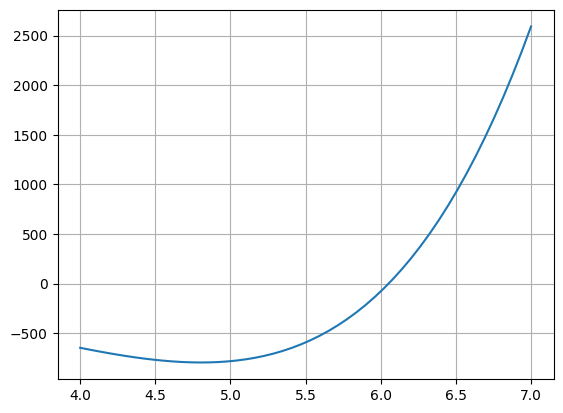

In [67]:
# Definição do intervalo
fx_ = x**5 - 5*x**4 - 7*x**3 + 4*x**2 - 6
display(Math('f(x) = ' + sy.latex(fx_)))
fx = sy.lambdify(x, fx_)
#plot(fx, [-100, 100])
#plot(fx, [-10, 10])
plot(fx, [4, 7])

In [ ]:
intervalo=[4,7]
raiz, iteracoes = secantes(fx, intervalo)
display(iteracoes)
#o metodo nao convergiu, tem que aproximar mais entre 5 e 7 funciona

,erro,x,f(x)
0,1.301894e-01,4.598703,-7.816599e+02
1,3.002235e+00,1.149034,-1.805095e+01
2,7.639129e-02,1.067487,-1.506337e+01
3,4.111590e-01,0.656328,-7.062012e+00
4,3.628896e-01,0.293438,-5.867339e+00
5,1.782242e+00,-1.488803,-5.913643e+00
6,1.006584e+00,226.129812,5.781199e+11
7,2.276186e+02,-1.488803,-5.913643e+00
8,2.328332e-09,-1.488803,-5.913642e+00
